Current Progress: 100.0 %
The old training dataframe shape: (2756, 11)
Total number of outliers identified is:  138
The new training dataframe shape: (2618, 11)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'bootstrap': True, 'max_features': 'auto', 'random_state': 10}
0.9264405128391974


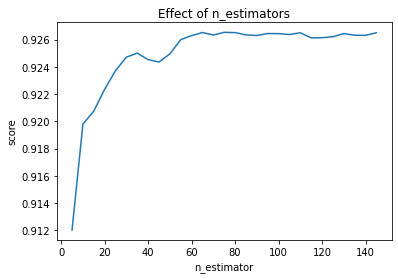

0.9245295999390866


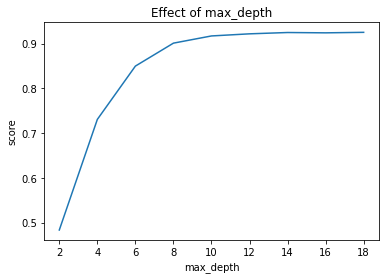

0.924850582132961


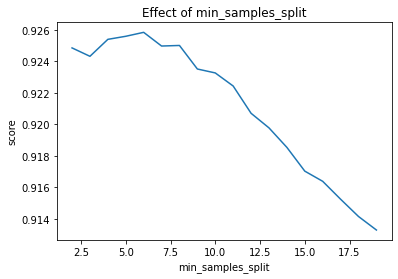

0.9232625569635236


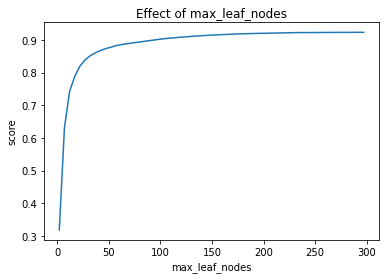

0.9144914303956803


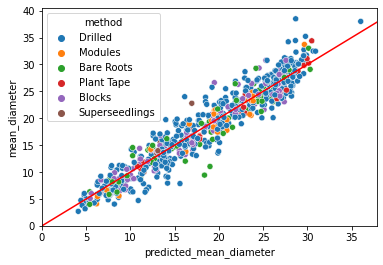

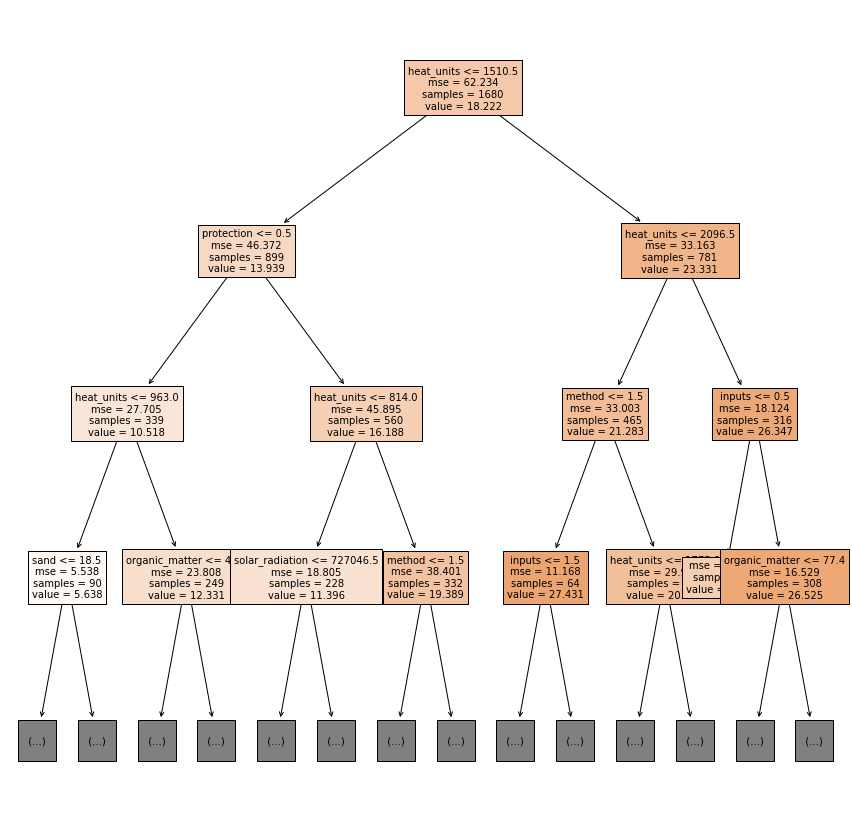

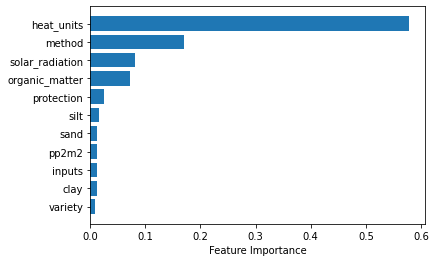

In [1]:
# Run preprocessing script to make dataframe objects available.

%run RFRegressionEval.ipynb

In [33]:
categorical_features = ['method', 'variety', 'inputs', 'protection']
categorical_transformer = Pipeline(
    [
        #('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('ordenc', OrdinalEncoder())
    ]
)

numeric_features = ['sand', 'silt', 'clay', 'organic_matter', 'pp2m2', 'solar_radiation', 'heat_units']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'mean')),
        #('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

rfr_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('rfr', rfr)
    ]
)

rfr_pipe_model = rfr_pipe.fit(X_train, y_train.values.ravel())
rfr_pipe_model_pred = rfr_pipe_model.predict(X_test)
print(rfr_pipe.score(X_test, y_test))

0.9143899598679021


In [34]:
X_train.columns

Index(['pp2m2', 'heat_units', 'solar_radiation', 'organic_matter', 'sand',
       'silt', 'clay', 'method', 'variety', 'inputs', 'protection'],
      dtype='object')

In [35]:
X_test.columns

Index(['pp2m2', 'heat_units', 'solar_radiation', 'organic_matter', 'sand',
       'silt', 'clay', 'method', 'variety', 'inputs', 'protection'],
      dtype='object')

In [36]:
rfr_pipe_model.named_steps.rfr.feature_importances_

array([0.16984545, 0.0085205 , 0.01155942, 0.0257774 , 0.01262522,
       0.01634994, 0.01162748, 0.07271513, 0.01201043, 0.08076587,
       0.57820317])

In [37]:
test_data_path = f"{directory}//prediction_test.csv"

test_data = pd.read_csv(test_data_path)

In [38]:
test_data

,pp2m2,heat_units,solar_radiation,organic_matter,sand,silt,clay,method,variety,inputs,protection
0,40,1000,100000,5,30,50,20,Drilled,Krypton,Conventional,Barley
1,35,1500,150000,10,30,50,20,Blocks,Chiefton,Conventional,None
2,37,2000,200000,20,30,50,20,Bare Roots,Krypton,Conventional,None
3,45,2500,250000,40,30,50,20,Modules,Chiefton,Organic,None
4,29,3000,300000,75,30,50,20,Drilled,Chiefton,Conventional,None
5,70,1000,100000,20,30,50,20,Drilled,Linkton,Baby,Poly
